In [1]:
from google.colab import drive

drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#cd /content/gdrive/'My Drive'/medium

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!pip install gdelt
import gdelt
gd = gdelt.gdelt(version=1)

     |████████████████████████████████| 778kB 6.4MB/s 


In [0]:
import os
os.makedirs("data",exist_ok=True)

In [6]:
import datetime
cur_date = datetime.datetime(2019,10,7)-datetime.timedelta(days=60)
end_date = datetime.datetime(2019,10,7)

while cur_date < end_date:

  print("%s-%s-%s"%(cur_date.year, cur_date.month, cur_date.day))
  if not os.path.exists("data/%s-%s-%s.pkl"%(cur_date.year, cur_date.month, cur_date.day)):

    year = cur_date.year
    month = str(cur_date.month)
    day = str(cur_date.day)
    
    if cur_date.month < 10:
      month = "0"+month
    if cur_date.day < 10:
      day = "0"+day

    results = gd.Search(['%s %s %s'%(year, month, day)],table='gkg',coverage=True, translation=False)
    results.to_pickle("data/%s-%s-%s.pkl"%(cur_date.year, cur_date.month, cur_date.day))



  
  cur_date+=datetime.timedelta(days=1)

2019-8-8
2019-8-9
2019-8-10
2019-8-11
2019-8-12
2019-8-13
2019-8-14
2019-8-15
2019-8-16
2019-8-17
2019-8-18
2019-8-19
2019-8-20
2019-8-21
2019-8-22
2019-8-23
2019-8-24
2019-8-25
2019-8-26
2019-8-27
2019-8-28
2019-8-29
2019-8-30
2019-8-31
2019-9-1
2019-9-2
2019-9-3
2019-9-4
2019-9-5
2019-9-6
2019-9-7
2019-9-8
2019-9-9
2019-9-10
2019-9-11
2019-9-12
2019-9-13
2019-9-14
2019-9-15
2019-9-16
2019-9-17
2019-9-18
2019-9-19
2019-9-20
2019-9-21
2019-9-22
2019-9-23
2019-9-24
2019-9-25
2019-9-26
2019-9-27
2019-9-28
2019-9-29
2019-9-30
2019-10-1
2019-10-2
2019-10-3
2019-10-4
2019-10-5
2019-10-6


In [0]:
mySources = ["nytimes.com", "washingtonpost.com", "foxnews.com", "cnn.com"]


In [0]:
df = pd.DataFrame()
k = os.listdir("data")
for i in k:
  print(i)
  if i.endswith(".pkl"):
    tmp = pd.read_pickle("data/"+i)
    tmp = tmp[tmp["SOURCES"].apply(lambda x: x in mySources)]
    df = pd.concat([df, tmp])

In [10]:
#len(df)
>>> 44112

44112

In [0]:
#df.to_pickle("four_pubs.pkl")

In [0]:
#df = pd.read_pickle("four_pubs.pkl")

In [13]:
#df.head()

,DATE,NUMARTS,COUNTS,THEMES,LOCATIONS,PERSONS,ORGANIZATIONS,TONE,CAMEOEVENTIDS,SOURCES,SOURCEURLS
37,20190808,1,"KILL#2#weekend#3#Washington, District Of Colum...",TAX_WEAPONS;TAX_WEAPONS_GUN;KILL;TERROR;ARMEDC...,"2#New York, United States#US#USNY#42.1497#-74....",mitch mcconnell;celia talbot tobin;terry meine...,walmart;new york times;national rifle association,"-3.28227571115974,2.84463894967177,6.126914660...","864501276,864572734,864719936,864719937,864719...",nytimes.com,https://www.nytimes.com/2019/08/08/us/politics...
246,20190808,1,NaN,GENERAL_HEALTH;MEDICAL;ECON_DEVELOPMENTORGS;EC...,"4#Cairo, Al Qahirah, Egypt#EG#EG11#30.05#31.25...",NaN,world health organization;associated press,"-1.36054421768708,2.04081632653061,3.401360544...",864497135,washingtonpost.com,https://www.washingtonpost.com/world/middle_ea...
260,20190808,1,NaN,TAX_ETHNICITY;TAX_ETHNICITY_AMERICAN;ELECTION;...,"2#California, United States#US#USCA#36.17#-119...",donna brazile;tulsi gabbard;michael brown,democratic national committee;shell;cnn,"-5.80357142857143,2.67857142857143,8.482142857...","864494557,864494558,864496396,864492009,864496...",foxnews.com,https://www.foxnews.com/media/donna-brazile-on...
307,20190808,1,NaN,TAX_ETHNICITY;TAX_ETHNICITY_CHINESE;TAX_WORLDL...,"1#China#CH#CH#35#105#CH;4#Beijing, Beijing, Ch...",joe mcdonald;donald trump;julian evans-pritchard,associated press;united states,"-5.0381679389313,1.98473282442748,7.0229007633...",NaN,washingtonpost.com,https://www.washingtonpost.com/business/techno...
375,20190808,1,"KILL#31##2#Texas, United States#US#USTX#31.106...",LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,1#Mexico#MX#MX#23#-102#MX;3#University Medical...,stephanie grisham;mike dewine;donald trump;mel...,walmart;republican party;u s senate;university...,"-4.32152117545376,2.33362143474503,6.655142610...","864489264,864489265,864489266,864502931,864489...",washingtonpost.com,https://www.washingtonpost.com/politics/the-la...


In [0]:
df.DATE = df.DATE.apply(lambda x: str(x))
df.DATE = pd.to_datetime(df.DATE)
df.fillna("", inplace=True)


In [0]:
df.set_index("DATE", drop=True, inplace=True)

In [0]:


df["dprk"] = df["LOCATIONS"].apply(lambda x: x.find("North Korea") > -1)
df["ukraine"] = df["LOCATIONS"].apply(lambda x: x.find("Ukraine") > -1)
df["russia"] = df["LOCATIONS"].apply(lambda x: x.find("Russia") > -1)
df["iran"] = df["LOCATIONS"].apply(lambda x: x.find("Iran") > -1)
df["china"] = df["LOCATIONS"].apply(lambda x: x.find("China") > -1)


loc_df = df.groupby(["SOURCES", "DATE"])[["dprk", "ukraine", "russia", "iran", "china"]].sum()

In [18]:
mySources = ["nytimes.com", "washingtonpost.com", "foxnews.com", "cnn.com"]


time_series = pd.DataFrame()
for publisher in mySources:
  time_series = pd.concat([time_series, loc_df.ix[publisher].add_prefix("{}_".format(publisher))], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


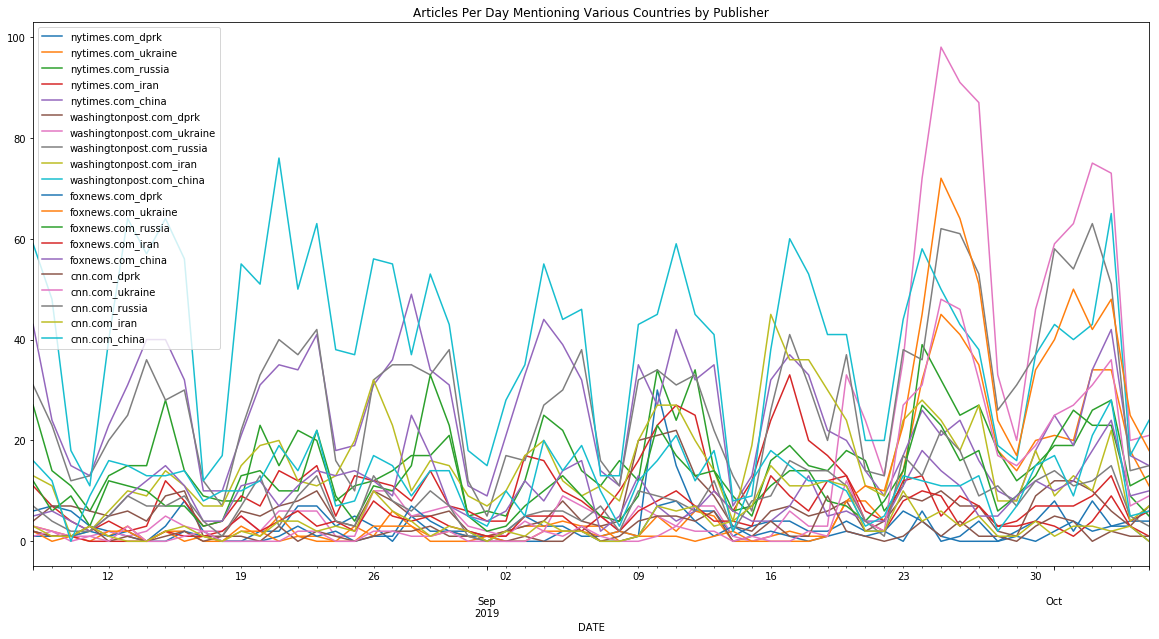

In [19]:
time_series.plot(figsize=(20,10), title="Articles Per Day Mentioning Various Countries by Publisher")

In [0]:
def get_supervised_df(df, issue, maxlag=1):
  
  original = df.copy()
    
  for i in range(maxlag):
    print(i)
    original= pd.concat([original, df.shift(i+1).add_suffix("_(t-%s)"%(i+2))], axis=1).dropna()

  myIssue = original[issue]
  
  original = original.shift().dropna()
 
  rename_dict = {}
  for column in df:
    rename_dict[column] = column+"(t-1)"
  original.rename(columns=rename_dict,inplace=True)
  
  original[issue] = myIssue
  
  return original.dropna()

In [0]:
time_series.head()

In [0]:
get_supervised_df(time_series, "nytimes.com_dprk").head()

In [0]:
from fastai.tabular import *

def genNN(myDF, issue):  
  reframed = get_supervised_df(myDF, issue, 7)


  days = []
  myOrder = reframed.columns.to_list()

  for i in range(7):
    reframed["day%s"%i] = (reframed.index.weekday==i).astype(int)

  for i in range(7):
    days.append("day%s"%i)



  reframed = reframed[days+myOrder]


  procs = []
  dep_var = reframed.columns[-1]
  cont_names = reframed.columns[:-1].to_list()
  path = "/content/gdrive/My Drive/medium"

  trainSize = 45
  print(trainSize, "/", len(reframed), "in validation")

  test = TabularList.from_df(reframed[trainSize:].copy(), path=path)
  data = TabularList.from_df(reframed[:trainSize], path=path, cont_names=cont_names)
    
  data = data.split_by_idx(range(40,45))
  data = data.label_from_df(cols=dep_var, label_cls=FloatList)
  data = data.add_test(test).databunch(bs=40)
  
  y_range = [reframed[dep_var].min(), reframed[dep_var].max()]
  emb_szs = data.get_emb_szs()
  n_cont = len(data.cont_names)
  out_sz = data.c
  layers = [50, 25]
  model = TabularModel(emb_szs=emb_szs,
                       n_cont=n_cont,
                       out_sz=data.c,
                       layers=layers,
                       y_range=y_range)
  learn = Learner(data, model, metrics=rmse)
  
  return learn


In [0]:
learn = genNN(time_series, "foxnews.com_russia")
learn.fit_one_cycle(1, 2e-02)

In [0]:
learn.fit_one_cycle(5, max_lr =3e-04)


In [0]:
h_predictions, *_ = learn.get_preds(DatasetType.Test)
#h_predictions = h_predictions.numpy()

v_predictions, *_ = learn.get_preds(DatasetType.Valid)
#h_predictions = h_predictions.numpy()

predictions, *_ = learn.get_preds(DatasetType.Train)
#predictions = predictions.numpy()

issue = "foxnews.com_russia"

results = time_series[[issue]][-52:]
results.columns = ["actual"]

results["predicted"] = (np.concatenate((predictions, v_predictions, h_predictions), axis=None))
results["m"] = results.actual[:len(predictions)].mean()


ax = results[["actual", "m"]].rename(columns={"m":"mean"}).plot(figsize=(12,8))
results["predicted"][:len(predictions)].plot(ax=ax, color="orangered", label="Train", title=issue)
results["predicted"][len(predictions)-1:-len(h_predictions)].plot(ax=ax, color="red", label="Validation")
results["predicted"][-len(h_predictions)-1:].plot(ax=ax, color="darkred", label="Test")

ax.legend()

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

testing = results.copy()

print("RMSE training  using mean: {}".format(sqrt(mean_squared_error(testing.actual, testing.m))))
print("RMSE training using model: {}".format(sqrt(mean_squared_error(testing.actual, testing.predicted))))

testing = results[-len(h_predictions)-1:].copy()

print("RMSE testing using mean: {}".format(sqrt(mean_squared_error(testing.actual, testing.m))))
print("RMSE testing using model: {}".format(sqrt(mean_squared_error(testing.actual, testing.predicted))))



In [0]:
import statsmodels.api as sm

In [0]:
res = sm.tsa.seasonal_decompose(time_series["foxnews.com_russia"])

In [0]:
res.s

In [0]:
seasonal_df = pd.DataFrame()
for col in time_series:
  seasonal_df[col] = sm.tsa.seasonal_decompose(time_series[col]).seasonal

In [0]:
seasonal_df.plot(figsize=(12,8))

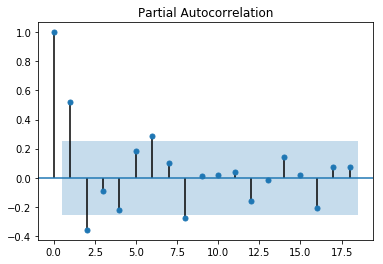

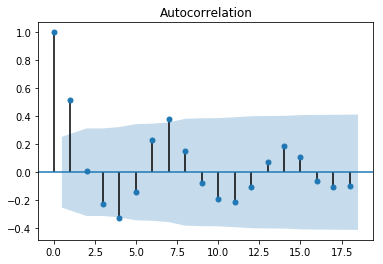

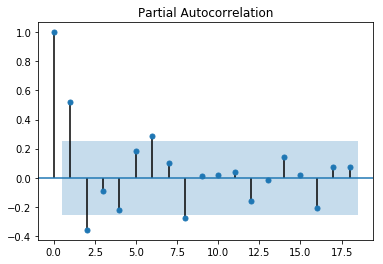

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(time_series["foxnews.com_russia"])
plot_pacf(time_series["foxnews.com_russia"])



In [0]:
f_ru = time_series[["foxnews.com_russia"]].copy()
f_ru.columns = ["actual"]
f_ru["sma"] = 0

for i in range(0,len(f_ru)-2):
  f_ru.iloc[i+2,1] = np.round(((f_ru.iloc[i,0]+ f_ru.iloc[i+1,0])/2),1)


In [0]:
f_ru.plot(title="Fox Russia prior 2 days SMA")

In [0]:
f_ru = f_ru[2:]

print("RMSE testing using SMA2: {}".format(sqrt(mean_squared_error(f_ru.actual, f_ru.sma))))


In [0]:
import statsmodels.api as sm

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [0]:
#time_series[[x for x in time_series.columns if x != issue]][:train_l].shift().add_suffix("_l1")[1:]

In [0]:
#mydf = time_series
issue = "foxnews.com_russia"
train_l = 55

s_model = SARIMAX(endog = time_series[[issue]][:train_l][1:],
                  exog = time_series[[x for x in time_series.columns if x != issue]][:train_l].shift().add_suffix("_l1")[1:],
                  order=(2,0,1), seasonal_order=(1,0,1,7)).fit()


In [0]:
#s_model.summary()

In [0]:
f_ru = time_series[[issue]].copy()[1:]
f_ru.columns = ["actual"]

In [0]:
f_ru["predicted"] = s_model.predict(end=datetime.datetime(2019, 10, 6), endog = time_series[[issue]][-5:],exog = time_series[[x for x in time_series.columns if x != issue]].shift()[-5:], 
                                            dynamic= False)

In [0]:
ax = f_ru["actual"].plot(title="Russia Mentions in Fox", figsize=(12,8))
f_ru["predicted"][:-5].plot(color="orange", label="predicted: Train")
f_ru["predicted"][-6:].plot(color="red", label="predicted: Test")
ax.legend()

In [0]:
testing = f_ru.copy()
testing.head()

In [0]:
len(testing.predicted)

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

testing = f_ru[:-5].copy()

print("RMSE training using model: {}".format(sqrt(mean_squared_error(testing.actual, testing.predicted))))

testing = f_ru[-5:].copy()

print("RMSE testing using model: {}".format(sqrt(mean_squared_error(testing.actual, testing.predicted))))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting 

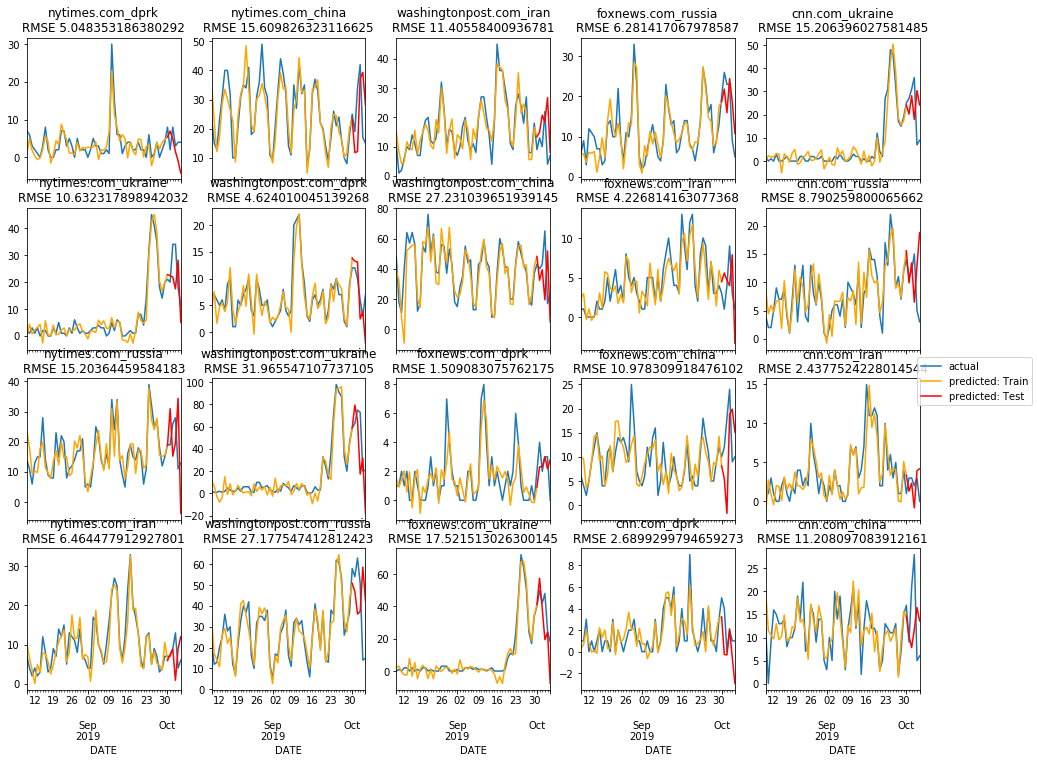

In [38]:

fig, axs = plt.subplots(4, 5, sharex=True)

fig.set_size_inches(16,12)

x = y = 0

for issue in time_series:
  train_l = 55

  s_model = SARIMAX(endog = time_series[[issue]][:train_l][1:],
                    exog = time_series[[x for x in time_series.columns if x != issue]][:train_l].shift().add_suffix("_l1")[1:],
                    order=(2,0,1), seasonal_order=(1,0,1,7)).fit()


  f_ru = time_series[[issue]].copy()[1:]
  f_ru.columns = ["actual"]
  f_ru["predicted"] = s_model.predict(end=datetime.datetime(2019, 10, 6), endog = time_series[[issue]][-5:],exog = time_series[[x for x in time_series.columns if x != issue]].shift()[-5:], 
                                            dynamic= False)
  
  testing = f_ru[-5:].copy()

  f_ru["actual"].plot(title="{}\nRMSE {}".format(issue, sqrt(mean_squared_error(testing.actual, testing.predicted))), ax=axs[x,y])
  f_ru["predicted"][:-5].plot(color="orange", label="predicted: Train", ax=axs[x,y])
  f_ru["predicted"][-6:].plot(color="red", label="predicted: Test", ax=axs[x,y])

  x+=1
  if x > 3:
    x =0
    y+=1

handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
